# Ссылочная модель данных Python
Напомним, что в Python модель хранения данных такова, что **имена — это ссылки на объекты**. Но не только имена могут быть ссылками. На самом деле список, кортеж и многие другие *контейнеры* содержат не сами объекты, а ссылки на них. Это становится очень важно, когда объекты *изменяемые*.

Например, списки `list` — изменяемые объекты, а строки — не изменяемые. Элемент списка можно заменить:

In [ ]:
a = list("КАЛБАСА")
print(*a, id(a))
a[1] = 'О'
print(*a, id(a))

К А Л Б А С А 139946499250928
К О Л Б А С А 139946499250928


Попытка заменить символ у строки приведёт к ошибке:

In [ ]:
b = "КАЛБАСА"
b[1] = 'О'

TypeError: 'str' object does not support item assignment

Даже если мы умудримся "изменить" строку, окажется, что это просто новый объект с тем же именем. Посмотрите на изменившийся `id` объекта:

In [ ]:
b = "КАЛБАСА"
print(*b, id(b))
b = b.replace("А", "О", 1)
print(*b, id(b))

К А Л Б А С А 139946481162368
К О Л Б А С А 139946518109520


А вот со списками — не так! Имя может продолжать ссылаться *на тот же объект*, но значение его *может измениться*.

Это шокирует некоторых начинающих программистов:

In [ ]:
a = list(range(10))
b = a
print("Имена a и b - это ", "один и тот же объект." if a is b else "разные объекты.")
print(*a, sep='\t')
b[1] = 100  # Меняем b, не a!
print(*a, sep='\t')

Имена a и b - это  один и тот же объект.
0	1	2	3	4	5	6	7	8	9
0	100	2	3	4	5	6	7	8	9


В то же время *разные объекты* могут быть друг другу *равны*. Для проверки равенства используется *оператор сравнения на равенство* из двух значков: `==`. Равенство списков понимается как *поэлементное равенство*.

In [ ]:
a = list(range(10))
b = list(a)  # здесь мы изготавливаем _новый_ список на основе копирования ссылок на элементы старого
print("Имена a и b - это ", "один и тот же объект." if a is b else "разные объекты.")
print("Списки a и b ", "равны друг другу." if a == b else "не равны друг другу.")

Имена a и b - это  разные объекты.
Списки a и b  равны друг другу.


# Действия со списками list в Python
Вы уже увидели, что можно менять значение конкретного элемента списка, выбрав его *по индексу* и присвоив новое значение: `a[i] = new_value`. Воспользуемся этим для поэлементной обработки всего списка чисел циклом `for`, без списковых включений:

In [ ]:
a = [1, 2, 3]
print(a)
for i in range(len(a)):
    a[i] = a[i] + 1
print(a)

[1, 2, 3]
[2, 3, 4]


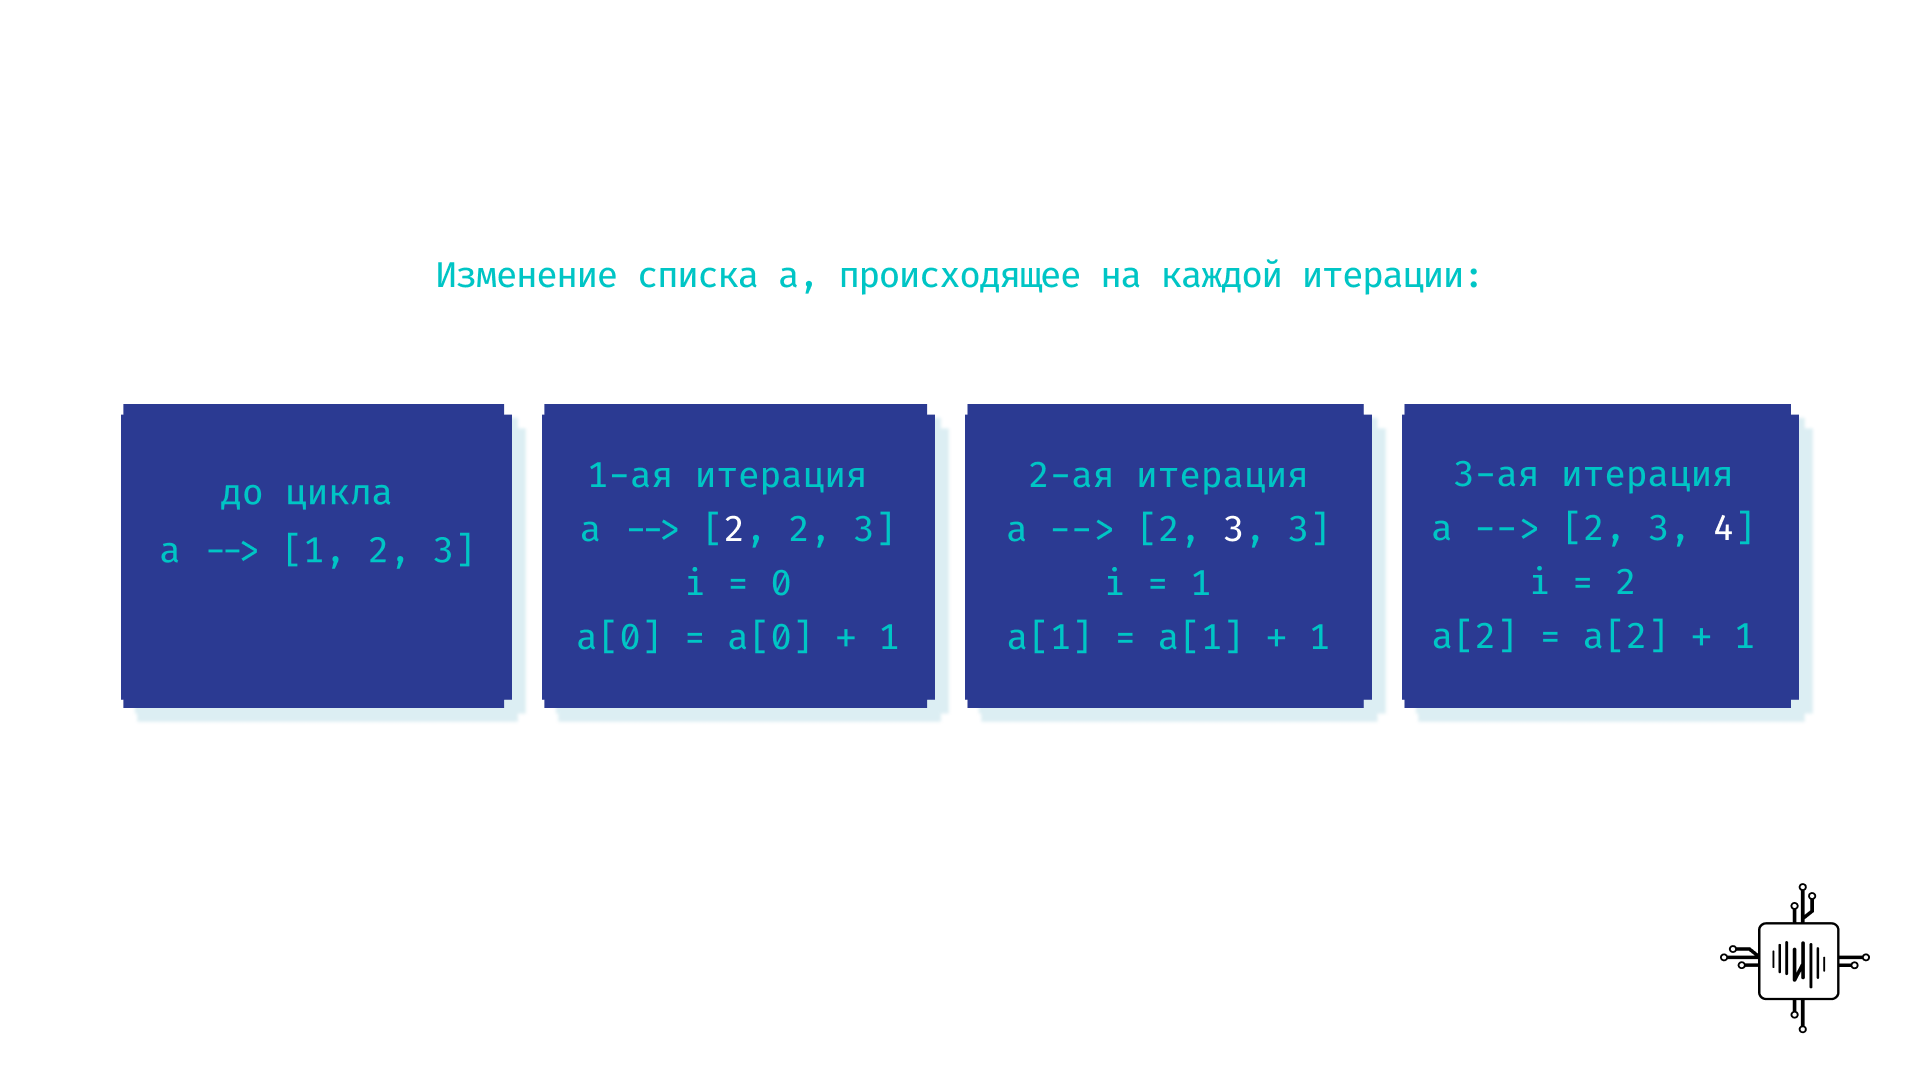

Функция `len(a)` возвращает количество элементов в списке, а функция `range(N)` генерирует арифметическую прогрессию от нуля до `N` не включительно. Таким образом, в этом цикле как раз окажутся перебраны *все возможные индексы данного списка по очереди*.

А теперь подумайте, почему в данном случае элементы списка не изменяются:

In [ ]:
a = [1, 2, 3]
print(a)
for x in a:
    x = x + 1  # Казалось бы, в этой строке мы меняем элементы списка, но нет...
print(a)

[1, 2, 3]
[1, 2, 3]


Вспомните, что числа `int` вообще *менять* нельзя, т.к. они не изменяемые. Что же тогда меняется?

Дело тут в том, что инструкция `x = x + 1` выполняется в два этапа: 
1. вычисление выражения справа, 
2. а затем уже присваивание (связывание имени с объектом).

И имя `x` *справа* от оператора присваивания `=` ссылается на один объект (на который также ссылается очередной `a[i]`), а *слева* этому имени присваивается ссылка *на другой объект*.

Тот же код, но с элементами интроспекции:

In [ ]:
a = [1, 2, 3]
print(a)
for i, x in enumerate(a):
    print(f"#{i}: x = {x}; a[i] = {a[i]};", "x is a[i]" if x is a[i] else "x is not a[i].")
    x = x + 1  # Казалось бы, в этой строке мы меняем элементы списка, но нет...
    print(f"#{i}: x = {x}; a[i] = {a[i]};", "x is a[i]" if x is a[i] else "x is not a[i].\n")
print(a)

[1, 2, 3]
#0: x = 1; a[i] = 1; x is a[i]
#0: x = 2; a[i] = 1; x is not a[i].

#1: x = 2; a[i] = 2; x is a[i]
#1: x = 3; a[i] = 2; x is not a[i].

#2: x = 3; a[i] = 3; x is a[i]
#2: x = 4; a[i] = 3; x is not a[i].

[1, 2, 3]


Вот ещё один пример, где мы как бы меняем список, а он не меняется:

In [ ]:
def list_changer(a: list):
    a = [10, 20, 30]
        
a = [1, 2, 3]
print(a)
list_changer(a)
print(a)

[1, 2, 3]
[1, 2, 3]


И здесь нам снова поможет интроспекция. Только теперь давайте отслеживать, тот же это объект или нет по его `id`:

In [ ]:
def list_changer(a: list):
    print(id(a))
    a = [10, 20, 30]
    print(id(a), "<--- локальное имя `a` стало ссылаться на другой объект!")
        
a = [1, 2, 3]
print(a, id(a), sep='\t')
list_changer(a)
print(a, id(a), sep='\t')

[1, 2, 3]	140262225147936
140262225147936
140262224405680 <--- локальное имя `a` стало ссылаться на другой объект!
[1, 2, 3]	140262225147936


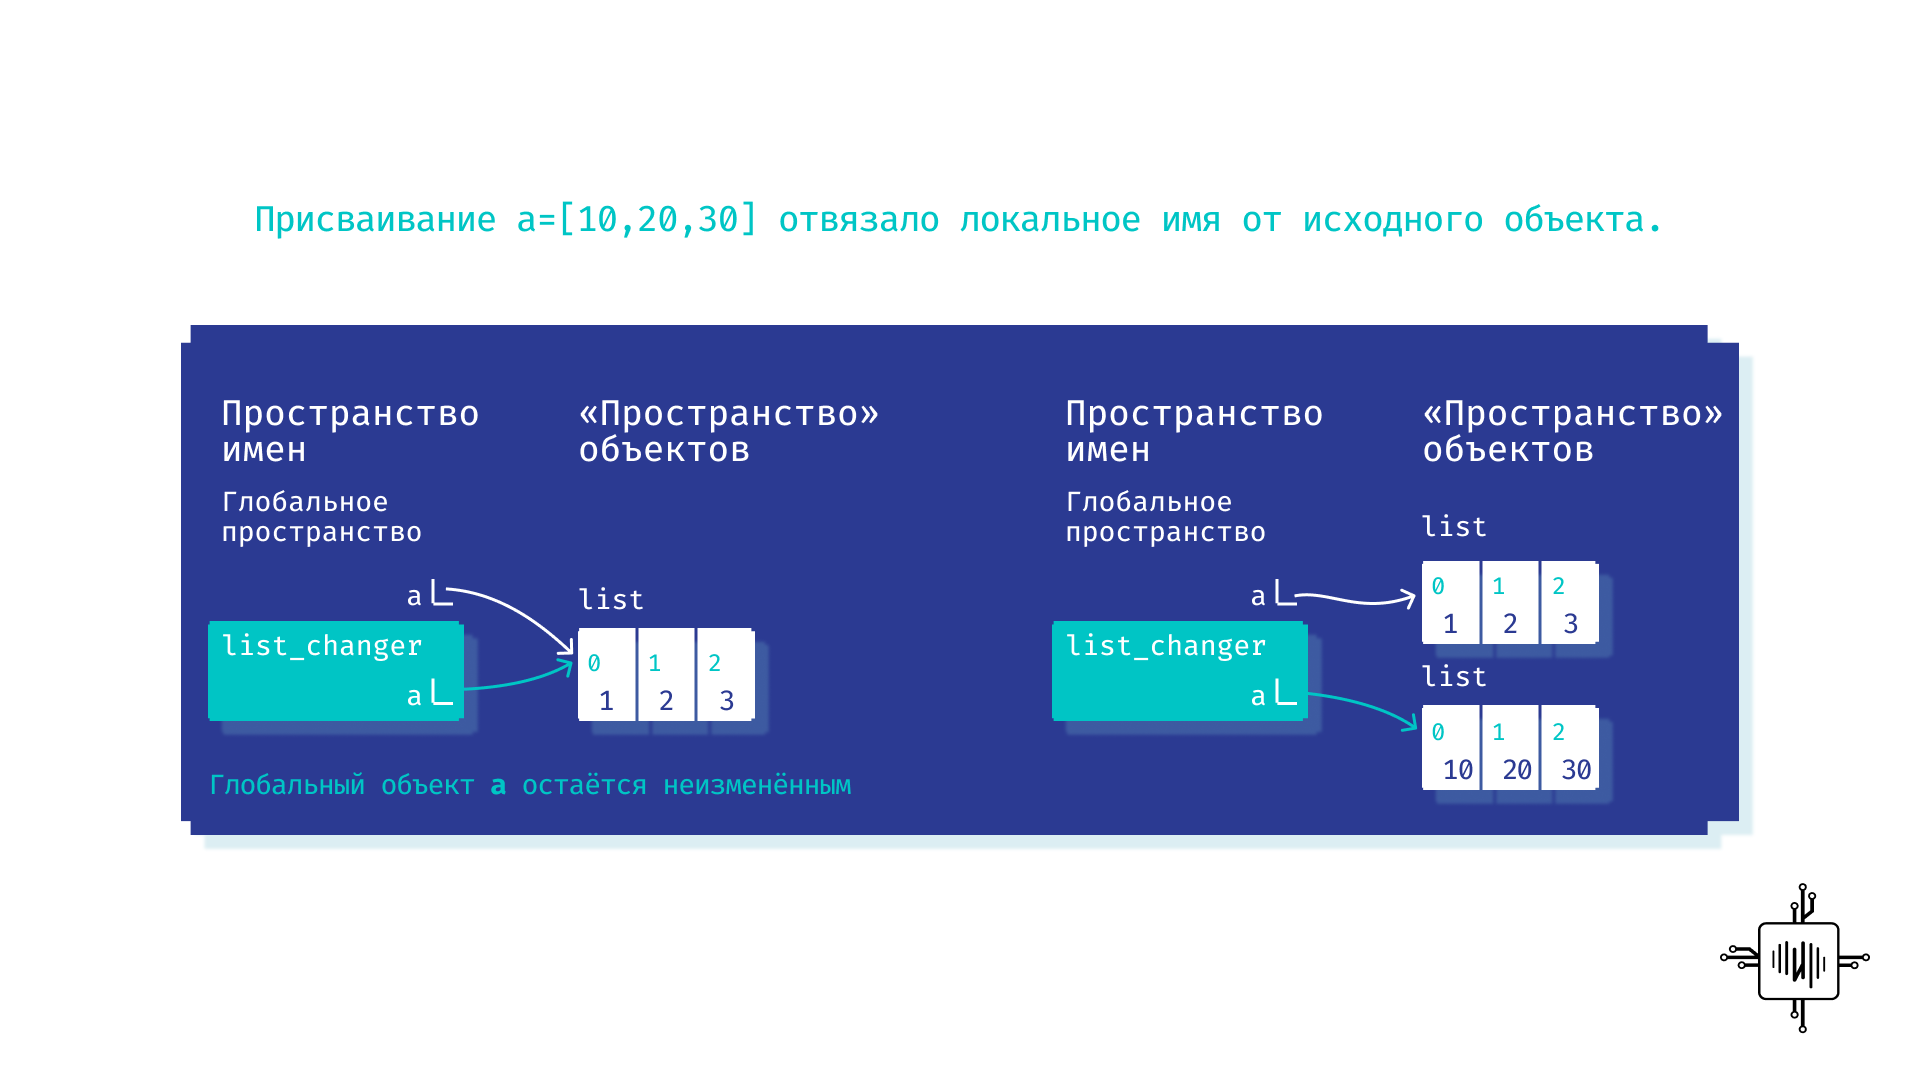

Давайте рассмотрим ещё один пример, в котором функция получает список в качестве параметра:

In [ ]:
def list_changer(b: list):
    for i in range(len(b)):
        b[i] *= 10
        
a = [1, 2, 3]
list_changer(a)

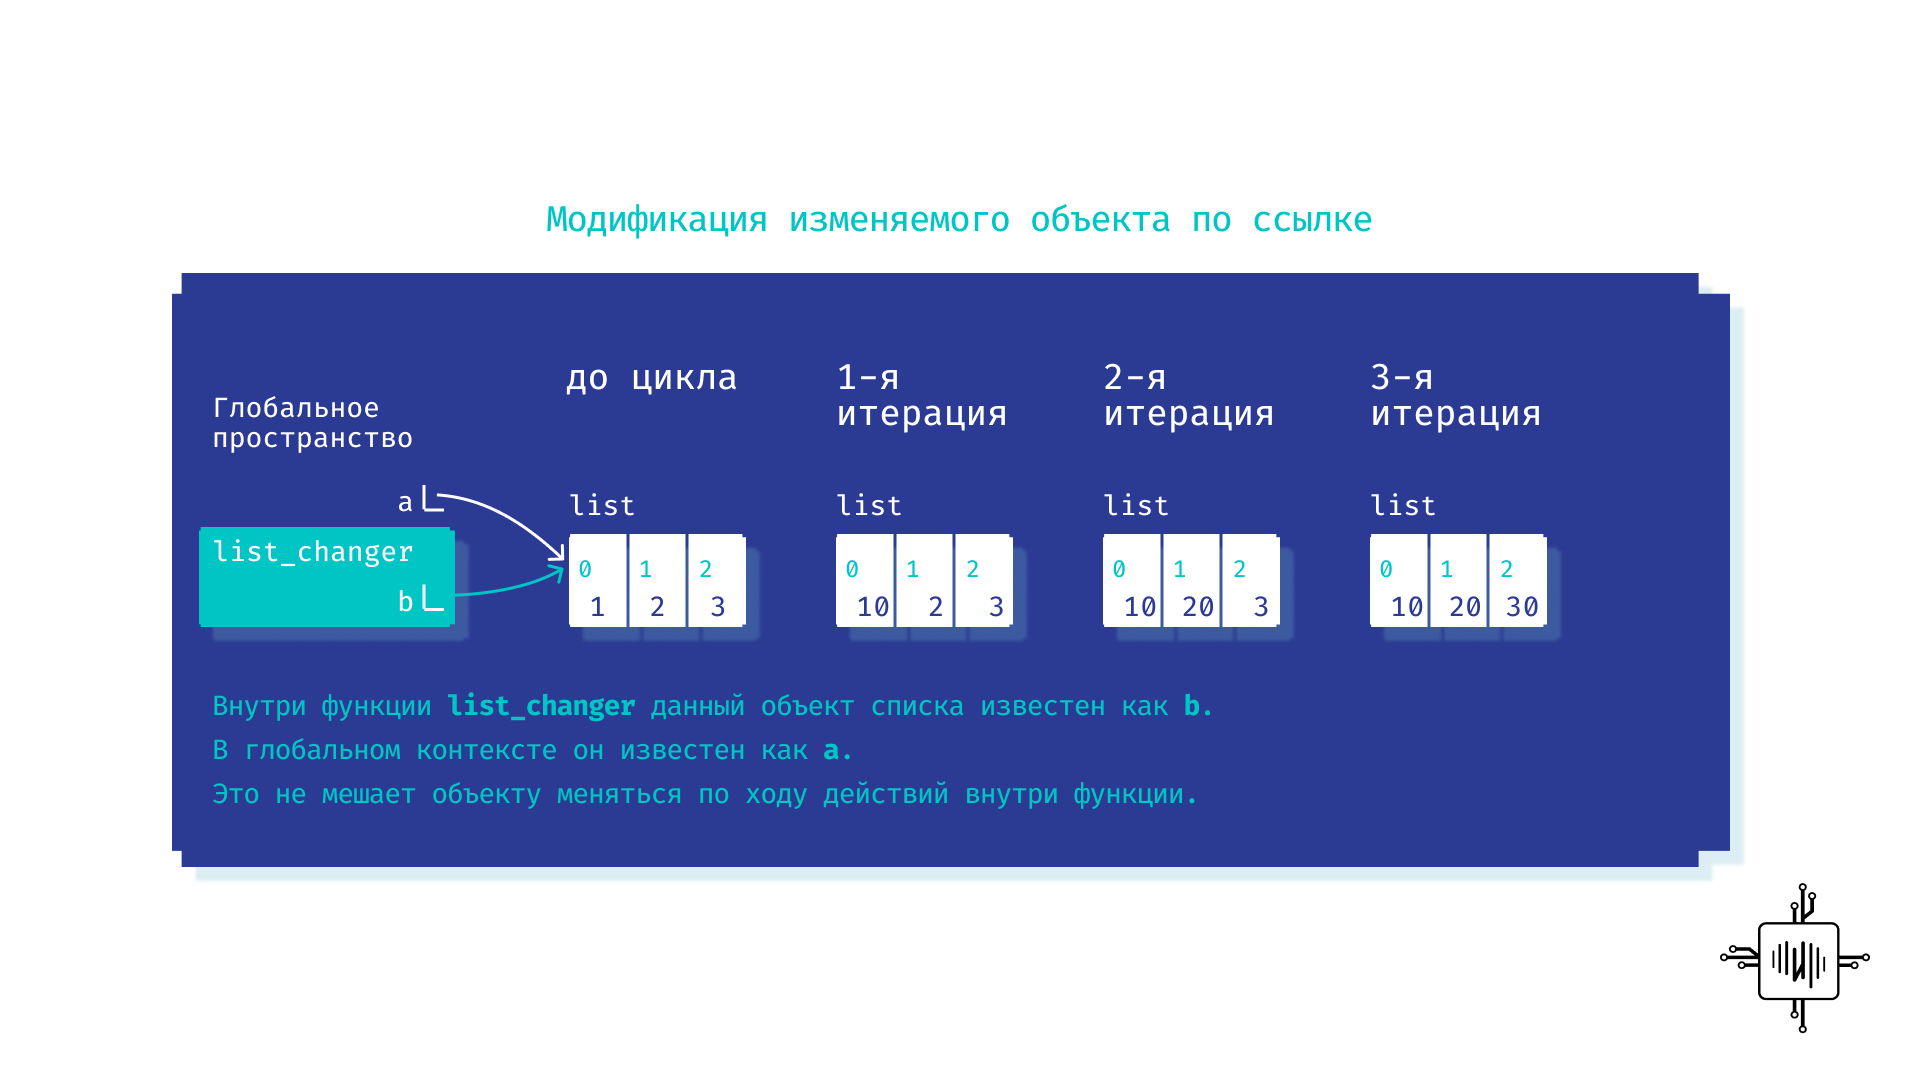

Догадайтесь, поменялся список или нет?

In [ ]:
print(a)

[10, 20, 30]


Как видите, поменялся. Да, внутри функции мы работали с объектом списка `a` под локальным именем `b`. Это имя стало как бы временным псевдонимом того же объекта, но всё же меняли мы *сам объект*, а не смысл имени.

Постепенно вы научитесь отличать, что происходит в той или иной операции: изменение *самого объекта* или изменение *ссылки* на объект.

Объекты каких типов могут храниться в списке? Любые! Более того, объекты разных типов могут там быть одновременно. Ведь хранятся в списке не объекты, а *ссылки на объекты*.

In [ ]:
a = ["Hello", 15, 1.23, 2 + 2 == 4, (7, 8) ,lambda x: x**2]
for x in a:
    print(x, type(x), sep='\t')

Hello	<class 'str'>
15	<class 'int'>
1.23	<class 'float'>
True	<class 'bool'>
(7, 8)	<class 'tuple'>
<function <lambda> at 0x7f9158168050>	<class 'function'>


Даже списки могут быть элементами списка! Однако, списки разнотипных элементов обычно неудобны и вряд ли вы их часто встретите.

## Срезы списков и строк 
Как вы помните, для списков работают *срезы* (slices), как они работают для строк: `a[start:stop:step]`.

При этом *индексы начинают считаться от нуля*, а элемент `a[stop]` с индексом `stop` не входит в срез.

Например, сделаем срез списка из 10 элементов со второго элемента по четвертый. Их индексы будут от 1 до 3 включительно, до 4 не включительно.

In [ ]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a[1:4]

[2, 3, 4]

Если срез берется с самого первого элемента, то его индекс можно не указывать.

In [ ]:
a[:4]

[1, 2, 3, 4]

То же самое и с последним элементом. Возьмем срез с 5-го до последнего элемента, при этом индекс последнего не указываем. 

In [ ]:
a[4:]

[5, 6, 7, 8, 9, 10]

Индексы в срезах могут быть и отрицательными (как и индексы в списках). Вспомним, что это значит. Например, какой элемент под номером минус 1 в нашем списке?

In [ ]:
a[-1]

10

Последний. Окей, что, если мы хотим взять срез со второго элемента до предпоследнего?

In [ ]:
a[1:-1]

[2, 3, 4, 5, 6, 7, 8, 9]

Тип "срезанного" списка — список, и это именно *новый объект типа `list`*.
Но обратите внимание, что  для строки `s[i]` — это именно срез, хоть и одной буквы, а для списка `a[i]` — это *не срез, а сам элемент списка*:

In [ ]:
s = "Hello"
print(s, s[0], s[0:3])
print(type(s), type(s[0:3]), type(s[0]))
a = list(range(10))
print(a, a[0], a[0:3])
print(type(a), type(a[0:3]), type(a[0]))

Hello H Hel
<class 'str'> <class 'str'> <class 'str'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 0 [0, 1, 2]
<class 'list'> <class 'list'> <class 'int'>


## Присваивание в срез списка
**Внимание!** Если срез находится *слева* от оператора присваивания, то *новый объект списка не создаётся*!

Срез списка слева от оператора присваивания — это способ доступа к избранным элементам списка (с учётом их порядка в срезе). То, что присваивается в срез списка, должно быть итерируемым объектом, и оно *распаковывается* в качестве новых элементов списка.

Примеры массового изменения элементов списка при помощи среза:

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a[3:8] = range(30, 80, 10)
print(a)

[0, 1, 2, 30, 40, 50, 60, 70, 8, 9]


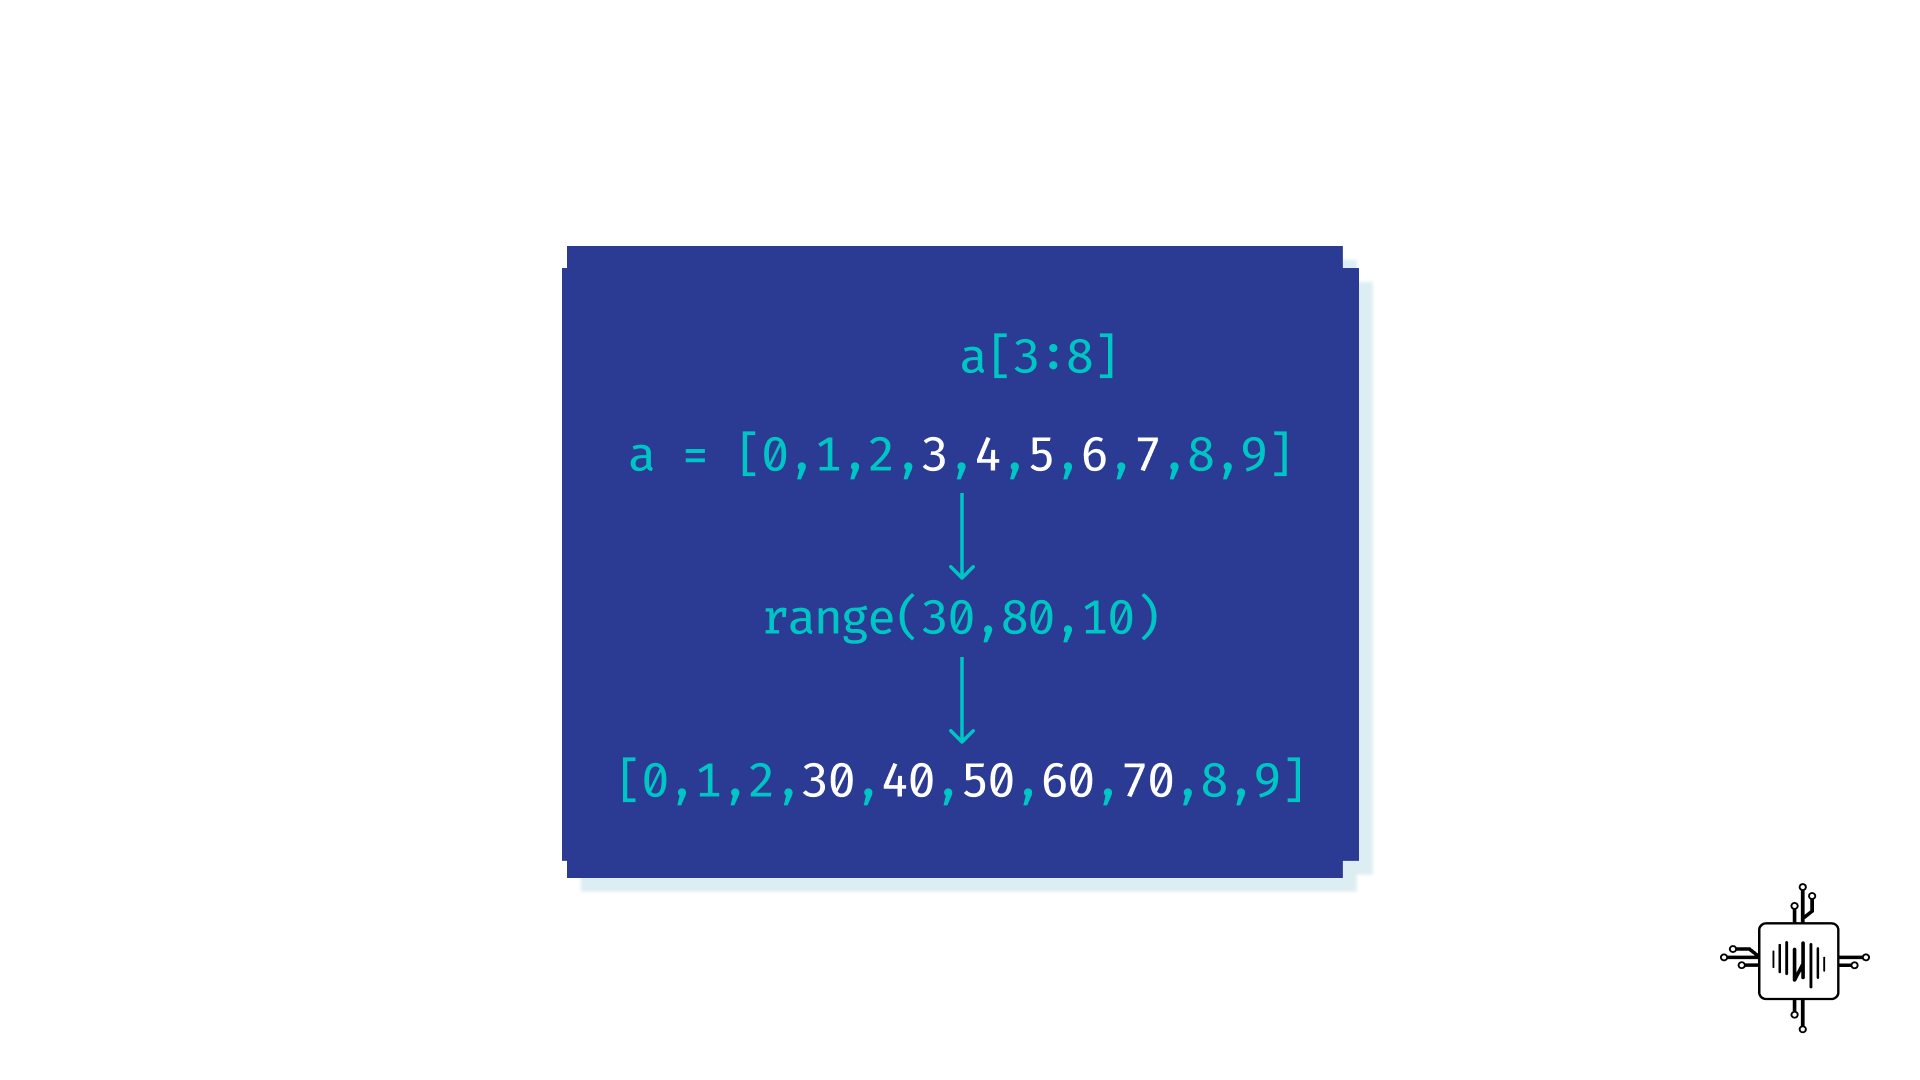

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a[::-2] = range(100, 600, 100)
print(a)

[0, 500, 2, 400, 4, 300, 6, 200, 8, 100]


Вплоть до того, что можно воспользоваться самим списком в качестве источника новых значений элементов. Здесь списку делается реверс:

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a[::-1] = a
print(a)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


При этом это тот же самый объект списка. Имя `a` указывает туда же, куда и раньше. Доказательство с операцией `is`:

In [ ]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = a
print("a =", a)
print("b =", b)
print("b is a" if b is a else "b is not a")
a[::-1] = a
print("b is a" if b is a else "b is not a")
print("a =", a)
print("b =", b)

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
b is a
b is a
a = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
b = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


## Операции, изменяющие длину списка
Одна из удобных особенностей списка — то, что он *динамический*. Его длина может измениться

### Добавление одного элемента

In [ ]:
a = [1, 2, 3, 4, 5]
a.insert(0, 0)
a

In [ ]:
a.insert(-1, 100)
a

[0, 1, 2, 3, 4, 100, 5]

In [ ]:
a.append(200)
a

[0, 1, 2, 3, 4, 100, 5, 200]

Пустой список можно заполнить, добавляя элементы по одному. Это может пригодиться, когда невозможно воспользоваться списковыми включениями. Например, когда конец ввода слов определяется пустой строкой, и мы не знаем заранее сколько надо считывать значения.

In [ ]:
words = []
x = input("Введите слово: ")
while x != "":
    words.append(x)
    x = input("Введите слово: ")
print(words)

KeyboardInterrupt: ignored

Вот ещё пример применения. Слова из строки мы прямо по ходу дела разбрасываем на три "корзины": только из заглавных букв, только из цифр и все остальные.

In [ ]:
s = "Я набрал 294 балла, и хотел поступать в МГУ, ВШЭ или МФТИ.".replace(',', '').replace('.', '')
capital_words = []
numbers = []
other_words = []
for word in s.split():
    if word.isupper():
        capital_words.append(word)
    elif word.isnumeric():
        numbers.append(word)
    else:
        other_words.append(word)
print(f"capital_words ={capital_words}")
print(f"numbers ={numbers}")
print(f"other_words ={other_words}")

Кстати, вы сможете сказать, почему эти пустые списки **нельзя инициализировать трамайным присваиванием**?

In [ ]:
s = "Я набрал 294 балла, и хотел поступать в МГУ, ВШЭ или МФТИ.".replace(',', '').replace('.', '')
capital_words = numbers = other_words = []
for word in s.split():
    if word.isupper():
        capital_words.append(word)
    elif word.isnumeric():
        numbers.append(word)
    else:
        other_words.append(word)
print(f"capital_words ={capital_words}")
print(f"numbers ={numbers}")
print(f"other_words ={other_words}")
print(id(capital_words), id(numbers), id(other_words), "<--- подсказка здесь.")

### Удаление одного элемента

In [ ]:
del a[5]
a

[0, 1, 2, 3, 4, 5, 200]

In [ ]:
a.pop()
a

[0, 1, 2, 3, 4, 5]

In [ ]:
a.pop(0)
a

[2, 3, 200]

Удаление элемента из начала длинного списка, как и вставка элемента в самое начало — трудоёмкая операция, лучше так не делать. А вот удаление с конца — нормальная практика, особенно если вам нужно разобрать список с конца, пока он не закончится (такая очередь с обратным порядком называется *стек*):

In [ ]:
while words:  # Читайте этот заголовок цикла так: **пока список слов не пуст**.
    print(words.pop())  # Пользуемся тем, что метод pop() не только удаляет элемент, но и возвращает его значение.

второго
дороже
слово
Первое


In [ ]:
print(words)  # Всё, слова кончились.

[]


### Добавление последовательности элементов

Метод `extend` и операция `+=` действуют одинаково, дополняя конец списка последовательностью элементов из данного им итерируемого объекта:

In [ ]:
a = list(range(5))
print(a)
a.extend(range(5, 10))
print(a)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
a += [10, 11, 12]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Срез с двумя параметрами *может отличаться по длине* от количества элементов в итерируемом объекте.
Это работает примерно так же, как если бы мы заменили часть поезда из несколько подряд идущих вагонов на другую сцепку вагонов. 

Естественно, после этого список может удлиниться или укоротиться, а элементы после вставки изменят свои индексы.

In [ ]:
print("старая длина списка:", len(a))
a[1:4] = range(11, 60, 11)
print("новая длина списка:", len(a))
a

старая длина списка: 13
новая длина списка: 15


[0, 11, 22, 33, 44, 55, 4, 5, 6, 7, 8, 9, 10, 11, 12]

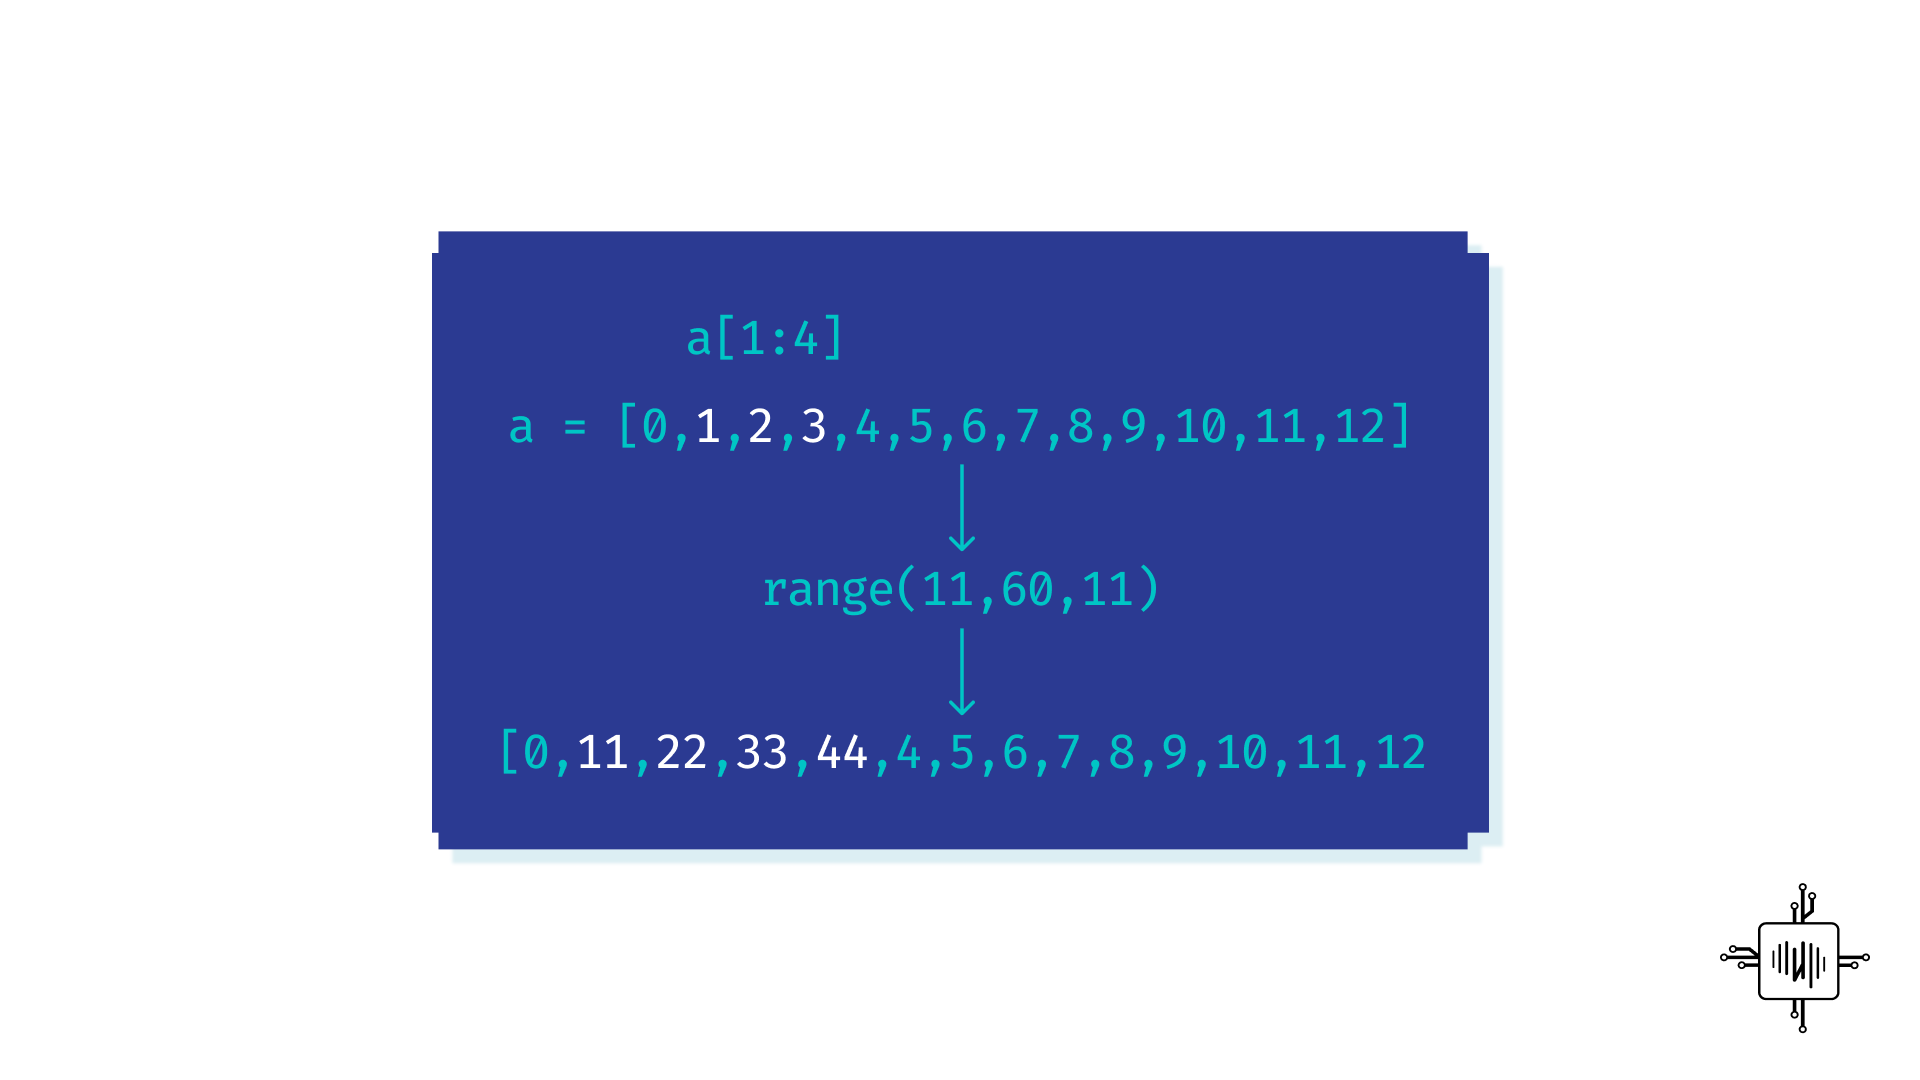

In [ ]:
print("старая длина списка:", len(a))
a[3:6] = (777,)  # Это кортеж tuple, содержащий только один элемент. Запятая перед скобкой тут нужна!
print("новая длина списка:", len(a))
a

старая длина списка: 15
новая длина списка: 13


[0, 11, 22, 777, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
a[3:6] = 777  # Число не является итерируемым объектом, а значит не может быть распаковано в кусок списка.

TypeError: can only assign an iterable

In [ ]:
a[3:6] = (777)  # Число не становится кортежем, если вокруг него поставить скобки.

TypeError: can only assign an iterable

При помощи присваивания в срез можно *удалить часть списка*, если положить туда пустую последовательность:

In [ ]:
a[1:4] = []
a

[0, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Впрочем, этого же можно добиться операцией `del` для среза:

In [ ]:
del a[1:4]
a

[0, 7, 8, 9, 10, 11, 12]

Срез, в котором нет элементов — бессмыслица? Не всегда. Если он слева от присваивания, то можно сделать так:

In [ ]:
print(a[1:1], len(a[1:1]))  # Ну он же реально пустой!
a[1:1] = range(10, 70, 10)
print(a)  # А вот и профит.

[] 0
[0, 10, 20, 30, 40, 50, 60, 7, 8, 9, 10, 11, 12]


## Сортировка списка
Список помнит последовательность элементов, а значит элементы можно переставлять. Перестановка, которая удовлетворяет некоторым *требованиям порядка*, является *результатом сортировки списка*.

**Отношение порядка** может быть разным, но оно *должно быть*. Это значит, что:
1. для каждой пары элементов было строго определено кто больше, а кто меньше (или они эквивалентны друг другу),
2. при этом выполнялась **транзитивность** сравнения: 
  * уж если `a == b`, `b == c`, тогда `a == c`,
  * а если `a > b`, `b > c`, тогда `a > c`.

В жизни это не всегда так: вспомните игру "Камень-ножницы-бумага".

### Стандартная сортировка: по возрастанию и по убыванию
В учебных курсах по алгоритмам много времени уделяется видам сортировок и их применимости. Это полезно для развития интеллекта, но на практике не нужно "изобретать велосипед", особенно если бесплатно работает "такси". В большинстве языков одна из лучших сортировок уже написана и встроена в инструменты самого языка. В Python это прагматическая TimSort.

Использовать её можно так:

In [ ]:
s = "Клара у Карла украла кораллы, Карл у Клары украл кларнет.".replace(',', '').replace('.', '')
words = s.split()
print(words)
words.sort()
print(words)

['Клара', 'у', 'Карла', 'украла', 'кораллы', 'Карл', 'у', 'Клары', 'украл', 'кларнет']
['Карл', 'Карла', 'Клара', 'Клары', 'кларнет', 'кораллы', 'у', 'у', 'украл', 'украла']


Обратите внимание на отношение порядка. Это *лексикографический* или *словарный порядок*: слова сравниваются по первой букве, и только если она одинаковая, то по второй и так далее. Если же все буквы в словах одинаковые, то большим считается более длинное слово. В этом случае `"кот" > "кит"`, а `"котёнок" > "кот"`.

При этом есть тонкость, что заглавные буквы считаются меньшими, чем строчные. Именно поэтому `"Клары" < "кларнет"`, хотя `"клары" > "кларнет"`, ведь буква Ы идёт по алфавиту позже, чем буква Н.

Сортировать можно не только по возрастанию (математики могут придраться и потребовать назвать его "нестрогим возрастанием" или "неубыванием", но программисты остаются при своём), но и *по убыванию*:

In [ ]:
a = [1, 2, 3, 5, 2, 123, 3, 22, 93, 10]
print(a)
a.sort(reverse=True)
print(a)

[1, 2, 3, 5, 2, 123, 3, 22, 93, 10]
[123, 93, 22, 10, 5, 3, 3, 2, 2, 1]


Сортировка TimSort сортирует список на месте, без привлечения большого количества добавочной оперативной памяти компьютера. Она является не только очень быстрой, но и обладает [*свойством устойчивости*](https://foxford.ru/wiki/informatika/ustoychivost-sortirovok).

### Использование ключа сортировки
И у метода `sort(),` и у функции `sorted()` есть параметр для задания способа сортировки: ключ `key`.

Значение этого параметра — некоторая функция, которая вызывается для каждого элемента перед их сравнением друг с другом. Сортируются по-прежнему сами элементы списка, но порядок их определяется не значениями элементов, а *ключевыми значениями элементов*, т.е. значениями ключевой функции для элементов.

Например, отсортируем список элементов, сравнивая их по длине. В этом случае ключевой функцией будет просто стандартная `len()`:

In [ ]:
s = "Клара у Карла украла кораллы, Карл у Клары украл кларнет.".replace(',', '').replace('.', '')
words = s.split()
print(words)
words.sort(key=len)
print(words)

['Клара', 'у', 'Карла', 'украла', 'кораллы', 'Карл', 'у', 'Клары', 'украл', 'кларнет']
['у', 'у', 'Карл', 'Клара', 'Карла', 'Клары', 'украл', 'украла', 'кораллы', 'кларнет']


Кстати, именно тут на словах `'Клара'`, `'Карла'`, `'Клары'` мы хорошо видим, что такое устойчивость сортировки. Эти слова одинаковой длины, а значит их порядок при такой ключевой функции не задан. Сортировка TimSort оставила их *в исходном порядке*, как они были в исходном списке.

Ключевая функция — отличное место для безымянной функции со словом `lambda`:

In [ ]:
s = "Клара у Карла украла кораллы, Карл у Клары украл кларнет.".replace(',', '').replace('.', '')
words = s.split()
print(words)
words.sort(key=lambda word: word.casefold())
print(words)

['Клара', 'у', 'Карла', 'украла', 'кораллы', 'Карл', 'у', 'Клары', 'украл', 'кларнет']
['Карл', 'Карла', 'Клара', 'кларнет', 'Клары', 'кораллы', 'у', 'у', 'украл', 'украла']


Как видите, теперь "кларнет" опередил "Клару", потому что перед сравнением происходит приведение регистра методом строки `casefold`.

При помощи `lambda` можно заложить в качестве ключевой функции почти что угодно! Хоть обратный порядок слов, если сравнивать не строки, а их срезы задом наперёд:

In [ ]:
s = "Клара у Карла украла кораллы, Карл у Клары украл кларнет.".replace(',', '').replace('.', '')
words = s.split()
print(words)
words.sort(key=lambda word: word[::-1])
print(words)

['Клара', 'у', 'Карла', 'украла', 'кораллы', 'Карл', 'у', 'Клары', 'украл', 'кларнет']
['украла', 'Карла', 'Клара', 'украл', 'Карл', 'кларнет', 'у', 'у', 'кораллы', 'Клары']


### Функция sorted
Иногда нам не нужно сортировать на месте, а нужно создать *отсортированную копию* исходного списка.

Это можно сделать двумя способами. Первый — изготовить копию, а затем отсортировать её:

In [ ]:
a = [6, 2, 7, 4, 5, 9, 8, 1, 0, 3]
b = list(a)
b.sort()
print(a)
print(b)

[6, 2, 7, 4, 5, 9, 8, 1, 0, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Второй — сразу создать отсортированный список:

In [ ]:
a = [6, 2, 7, 4, 5, 9, 8, 1, 0, 3]
b = sorted(a)
print(a)
print(b)

[6, 2, 7, 4, 5, 9, 8, 1, 0, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Второй способ короче и естественнее. Значение функции `sorted` — это именно список `list`. Ключи `reverse` и `key` метода `sort` работают и для функции `sorted`.

In [ ]:
a = list(range(10))
b = sorted(a, key=lambda x: abs(x-4.5), reverse=True)
print(b)

[0, 9, 1, 8, 2, 7, 3, 6, 4, 5]


## Копирование объектов list
Чтобы изготовить копию списка, а исходный список оставить в покое, есть несколько способов:
1. использовать конструктор list: `b = list(a)`;
2. написать списковое включение: `c = [x for x in a]`;
3. взять срез списка "от края до края": `d = a[:]`;
4. вызвать метод списка `copy()`: `e = a.copy()`;
5. вызвать функцию `deepcopy` модуля [copy](https://docs.python.org/3/library/copy.html).

Последний вариант самый "крутой". Он обеспечивает вложенную генерацию копий всех изменяемых объектов, лежащих внутри копируемого списка. И подходит он не только для списков, но и для других стандартных контейнеров.

In [ ]:
from copy import deepcopy
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = list(a)
c = [x for x in a]
d = a[:]
e = a.copy()
f = deepcopy(a)
for the_list in a, b, c, d, e, f:
    print(the_list, id(the_list))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163250305616
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163241634384
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163250314368
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163241634944
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163250288032
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163250336704


И только простым присваиванием получается не копия, а *ссылка на тот же список*:

In [ ]:
g = a  # Это не копирование!!!
print(g, id(g))
print(g is a)  # <--- просто это один объект под разными именами.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 140163250305616
True


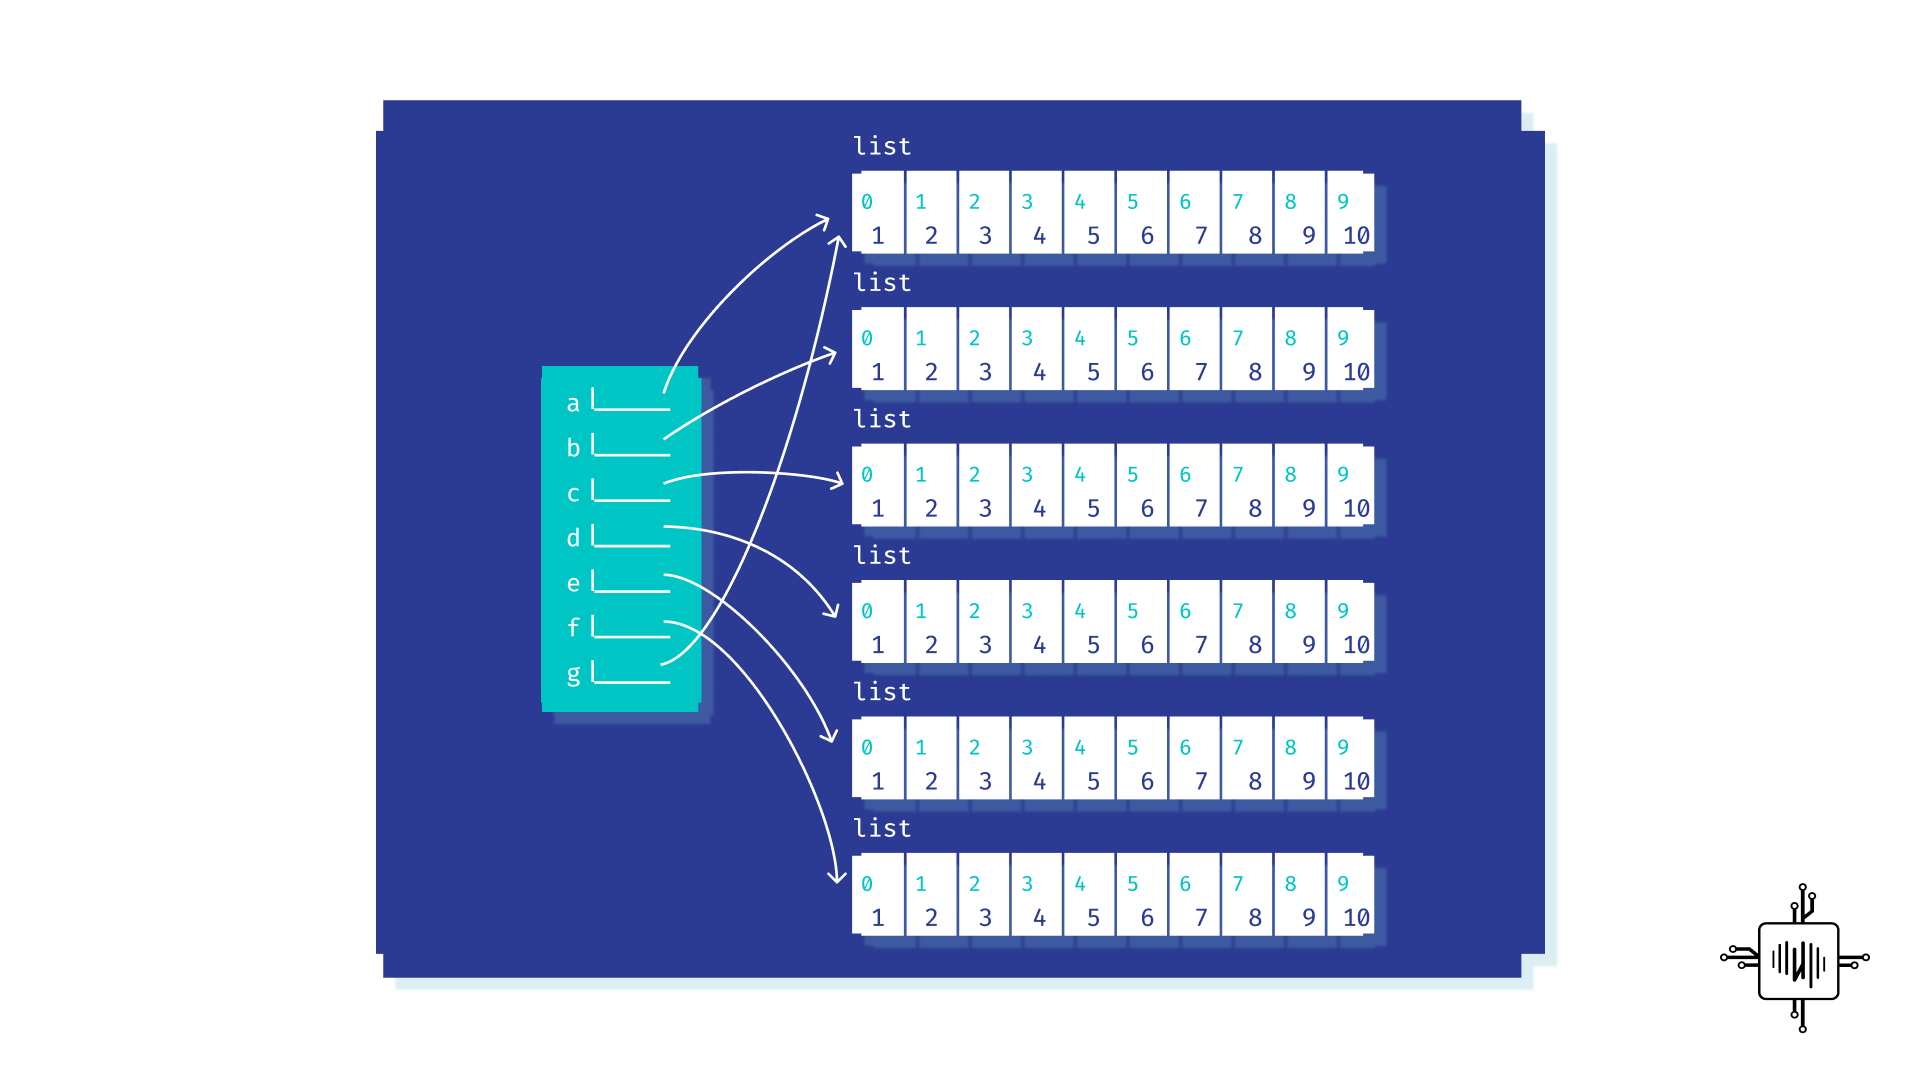

Почему так важно понимать методы изготовления копии, вы сейчас поймёте.

# Двумерные массивы (списки списков)
Периодические данные, которые требуется обрабатывать — это не одномерный, а двумерный массив. Например, массив пикселей.

В этом случае, нужно иметь индекс элемента как по вертикали, так и по горизонтали: `a[i][j]`.

"Родной" способ для этого — вложенные списки.
Если `a[i]` будет списком, то к нему тоже можно применить операцию взятия индекса. Подчеркнём круглыми скобками последовательность двух операций, ведь тут их именно две: `(a[i])[j]`.

Пример распечатки такого списка как есть, а затем построчно:

In [ ]:
the_list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(the_list_of_lists)
for the_list in the_list_of_lists:
    print(*the_list, sep='\t')

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
1	2	3
4	5	6
7	8	9


Как создать такой список автоматически?

In [ ]:
the_list_of_lists = []
for i in range(3):
    the_list = [0] * 3
    the_list_of_lists.append(the_list)
print(the_list_of_lists)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


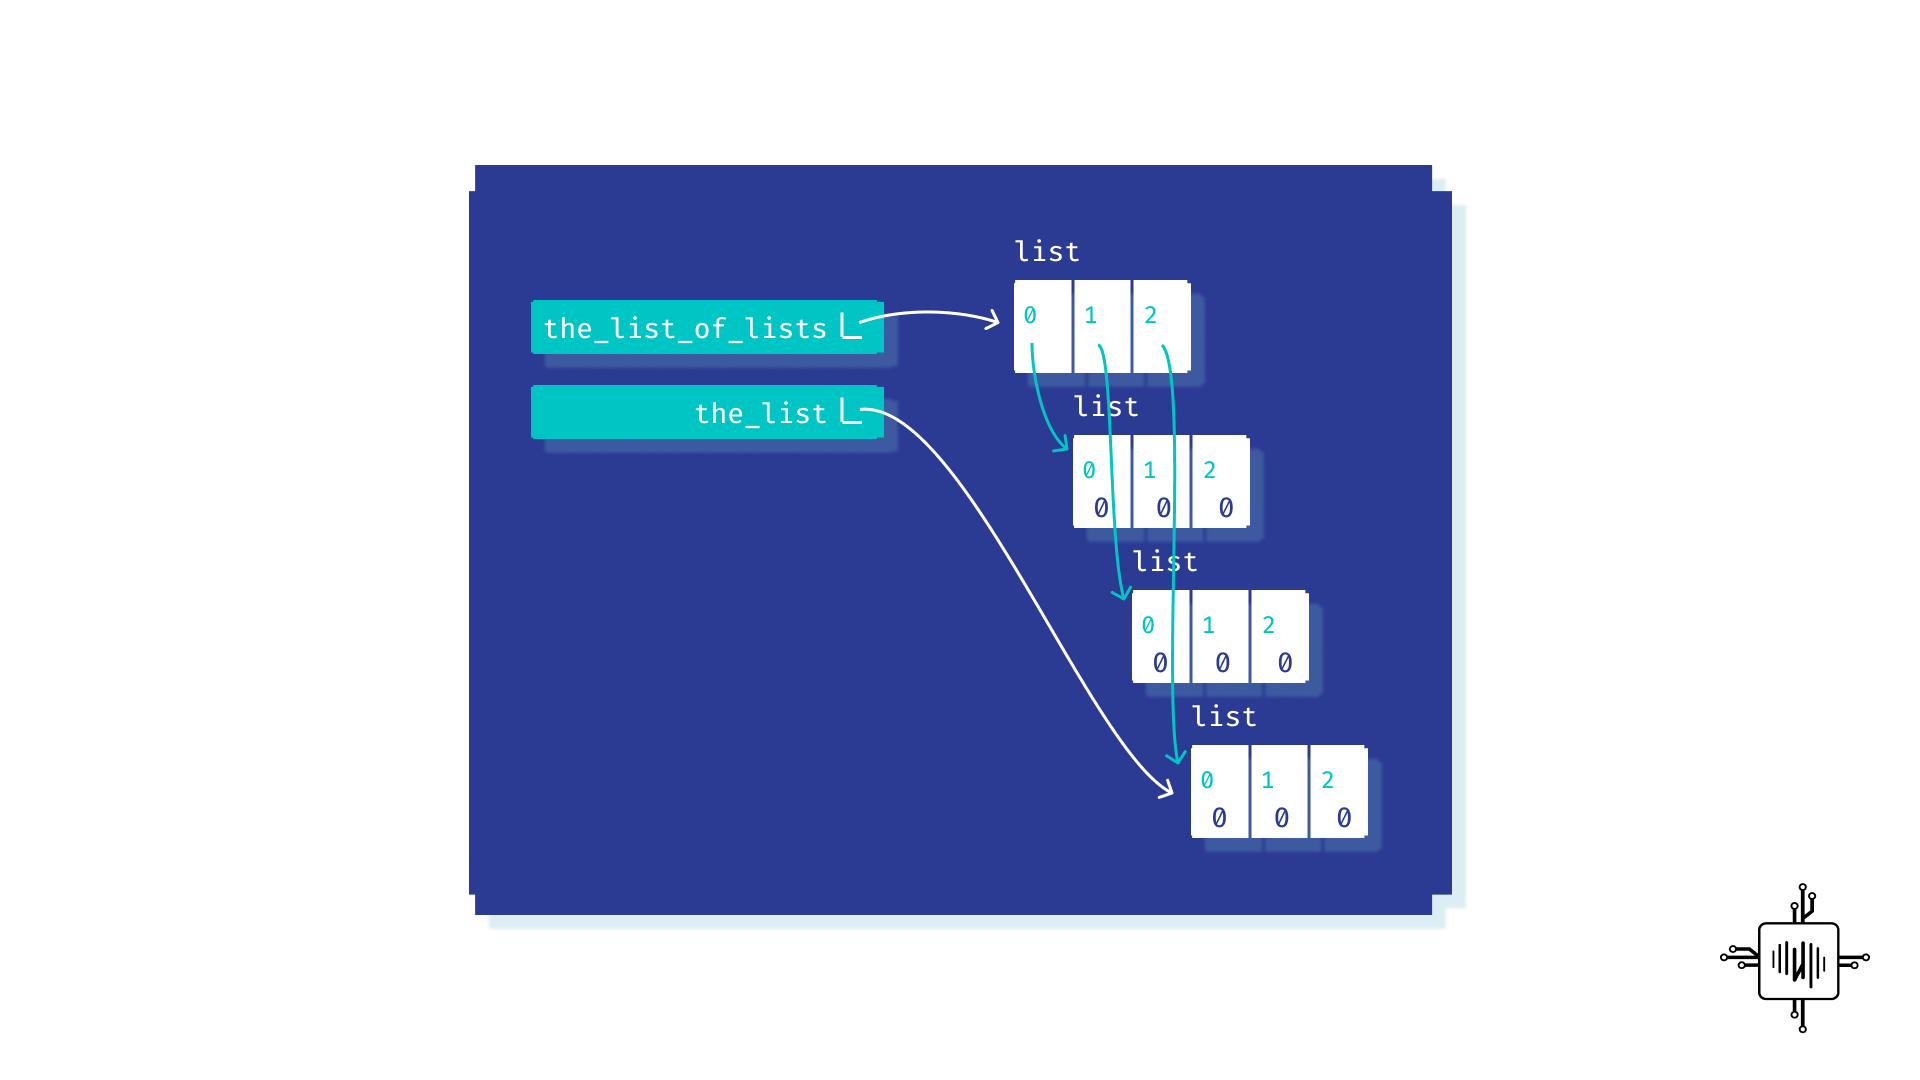

Список 3х3 у нас есть, но надо его теперь заполнить числами от 1 до 9. Можно сделать это так:

In [ ]:
n = 1
for i in range(3):
    for k in range(3):
        the_list_of_lists[i][k] = n
        n += 1
print(the_list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


А нельзя ли проще? Ведь одномерный список мы можем изготавливать при помощи операции повторения: `a = [0]*3`.

Сделаем список из одного элемента — списка нужной длины (строки), а затем повторим нужное число раз:

In [ ]:
the_list_of_lists = [[0] * 3] * 3  # Так делать нельзя!!!
print(the_list_of_lists)
for the_list in the_list_of_lists:
    print(*the_list, sep='\t')

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
0	0	0
0	0	0
0	0	0


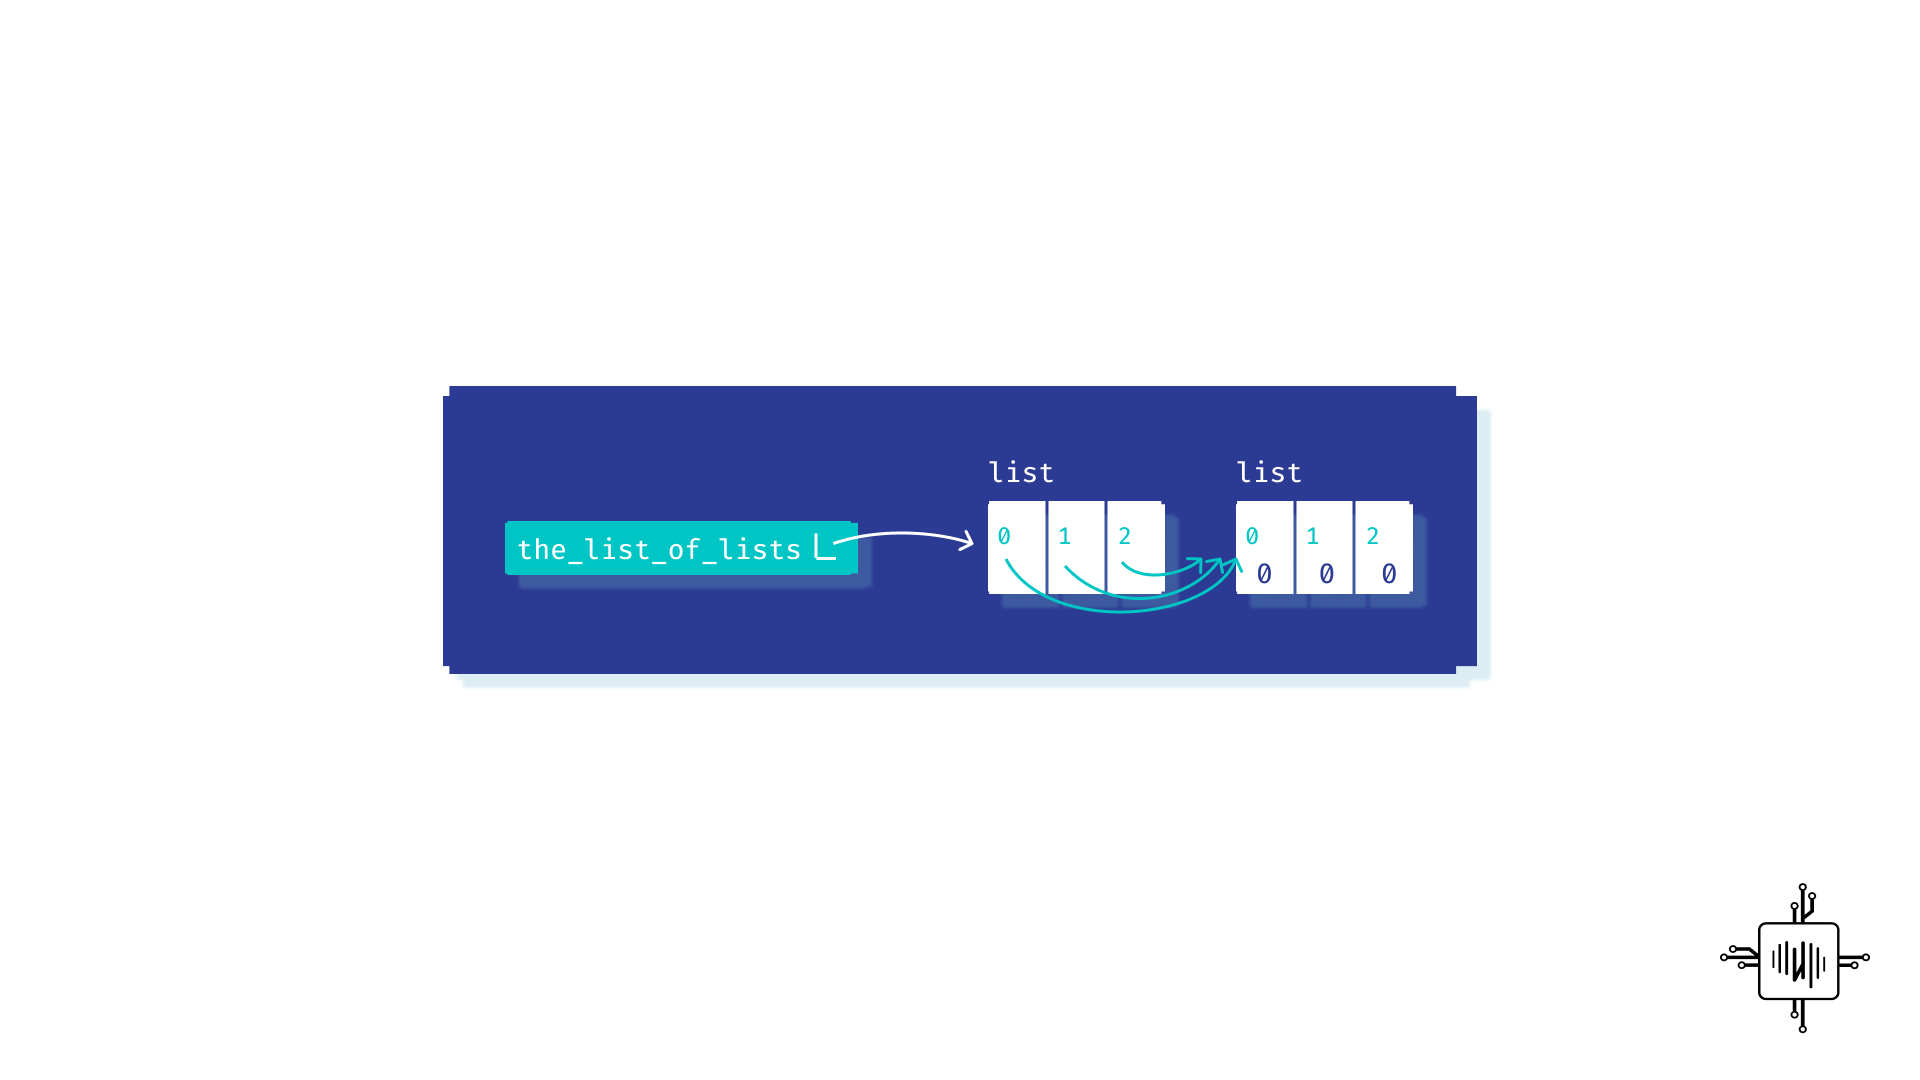

*Кажется*, что это успех, но рано радоваться. Давайте заполним этот "двумерный" массив:

In [ ]:
n = 1
for i in range(3):
    for k in range(3):
        the_list_of_lists[i][k] = n
        n += 1
print(the_list_of_lists)

[[7, 8, 9], [7, 8, 9], [7, 8, 9]]


Проблему можно увидеть, если внимательно посмотреть на объекты строк: это не одинаковые строки, а реально *один и тот же объект*:

In [ ]:
for the_list in the_list_of_lists:
    print(the_list, id(the_list))

[7, 8, 9] 140163241686912
[7, 8, 9] 140163241686912
[7, 8, 9] 140163241686912


## Вложенная генерация
Хороший способ **правильно создать** вложенные списки — вложенные генераторы списков (списковые включения):

In [ ]:
the_list_of_lists = [[(i*6 + k + 1) for k in range(6)] for i in range(4)]
for the_list in the_list_of_lists:
    print(*the_list, sep='\t')

1	2	3	4	5	6
7	8	9	10	11	12
13	14	15	16	17	18
19	20	21	22	23	24


## Разные длины вложенных списков
Никто не гарантирует вам "прямоугольность" этого как бы двумерного "массива". Вложенные списки могут быть разной длины:

In [ ]:
a = [[1], [2, 3], [4, 5, 6], [7, 8, 9, 10], [11], [12, 13]]
print(a)
for row in a:
    print(row)

[[1], [2, 3], [4, 5, 6], [7, 8, 9, 10], [11], [12, 13]]
[1]
[2, 3]
[4, 5, 6]
[7, 8, 9, 10]
[11]
[12, 13]


Такие списки списков вполне имеют право на жизнь. Давайте отсортируем сам список списков, а затем уже вложенные списки, при этом в первом случае используем особенный ключ — длину вложенного списка, а во втором будем сортировать по убыванию:

In [ ]:
a.sort(key=len)
print(*a, sep='\n')

[1]
[11]
[2, 3]
[12, 13]
[4, 5, 6]
[7, 8, 9, 10]


In [ ]:
for row in a:
    row.sort(reverse=True)
print(*a, sep='\n')

[1] [11] [3, 2] [13, 12] [6, 5, 4] [10, 9, 8, 7]


## Отказ от вложенных списков
Вложенные списки хороши для своих целей. Но если вам дан строго *прямоугольный массив чисел*, который математики называют **матрицей**, то можно порекомендовать отказаться от вложенных списков, как от медленной структуры. 

Есть два способа отказаться от вложенных списков в качестве двумерных списков:
1. использование Numpy.array;
2. линеаризация.

Первый способ вы узнаете через пару недель. Он идеален, когда в массиве хранятся числа. Второй используется довольно редко в специфических ситуациях.

Идея линеаризации в том, что *на самом деле* список линейный, и у него реально есть только один индекс ячейки.
Но мы каждый раз *вычисляем фактический индекс по индексу строки и столбца*: `index = i*M + k`.
Здесь `i` — индекс строки, а `k` — индекс элемента в строке (или, если хотите, индекс столбца).

In [ ]:
M = 6  # Ширина таблицы. Она же — длина строк таблицы или количество столбцов.
N = 4  # Высота таблицы. Количество строк таблицы.
a = [(x+1) for x in range(M * N)]
print(a)
for i in range(N):
    for k in range(M):
        print(a[i*M + k], end='\t')  # Расплата за простоту — **эмуляция двумерности**.
    print()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
1	2	3	4	5	6	
7	8	9	10	11	12	
13	14	15	16	17	18	
19	20	21	22	23	24	
